In [2]:
import pandas as pd
data = pd.read_csv("WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [3]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


C:\Users\smdhuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

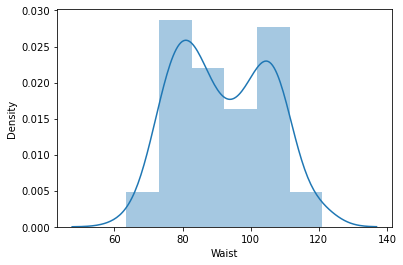

In [19]:
import seaborn as sns
sns.distplot(data['Waist'])

C:\Users\smdhuri\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

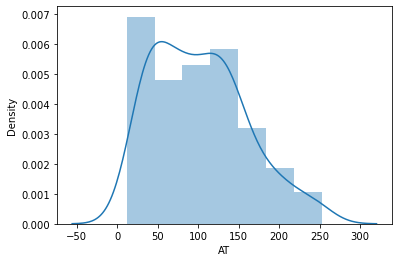

In [5]:
import seaborn as sns
sns.distplot(data['AT'])

In [3]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

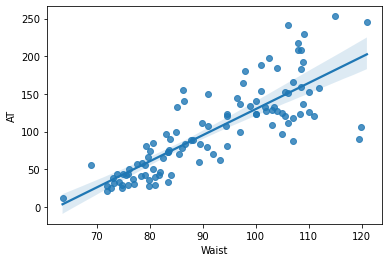

In [6]:
sns.regplot(x="Waist", y="AT", data=data);

In [7]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [16]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [10]:
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

In [20]:
newdata=pd.Series([70,80])

In [21]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [22]:
model.predict(data_pred)

0    26.138669
1    60.727263
dtype: float64

In [ ]:
H0 : Coefficients are not significant (zero)
Ha: Coefficients are significant

P_value is very small then we reject H0 hypothesis

In [10]:
import pandas as pd
data = pd.read_csv("WC_AT.csv")
#data.head()
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

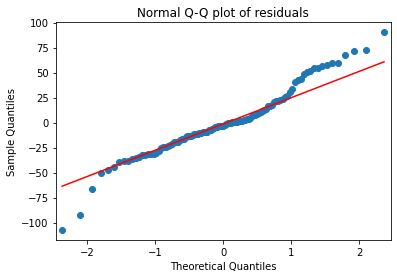

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()